In [63]:
%matplotlib inline
%reset
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import scipy
import skrf as rf # scikit-rf (install using conda -c scikit-rf scikit-rf (or pip))
import sympy # sympy (install using conda -c sympy sympy (or pip))
from sympy import I # imaginary symbol
rf.stylely() # enable scikit-rf plot styles
sympy.init_printing(use_latex='mathjax') # print sympy equations in MathJAX (for Jupyter)

# Symbolic math helper functions
def ll(a, b): # return a and b in parallel
    return (a * b) / (a + b)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [106]:
def RC_parallel_analysis():
    w, C, R = sympy.symbols('w C R', real=True)
    Z_in = sympy.simplify(ll(R, 1/(I * w * C)))
    display(Z_in)
    display(sympy.simplify(sympy.re(Z_in)))
    display(sympy.simplify(sympy.im(Z_in)))
def RC_series_analysis():
    w, C, R = sympy.symbols('w C R', real=True)
    Z_in = sympy.simplify(R + (1/(I * w * C)))
    display(Z_in)
    display(sympy.simplify(sympy.re(Z_in)))
    display(sympy.simplify(sympy.im(Z_in)))
def parallel_resonator():
    a, b, x = sympy.symbols('a b x', real=True)
    Z_in = sympy.simplify(ll(x, a + I*b))
    display(Z_in)
    print(sympy.latex(Z_in))
    sol = sympy.solveset(sympy.Eq(Z_in, a), x)
    display(sol)
    sol = sol.subs([(a, 70), (b, 100)])
    display(sol)
    return sol
ll_res_equ = parallel_resonator()

x⋅(a + ⅈ⋅b)
───────────
a + ⅈ⋅b + x

\frac{x \left(a + i b\right)}{a + i b + x}


⎧     2    ⎫             
⎪  ⅈ⋅a     ⎪             
⎨- ──── + a⎬ \ {-a - ⅈ⋅b}
⎪   b      ⎪             
⎩          ⎭             

{70 - 49⋅ⅈ}

In [114]:
# problem 2 analysis
# convert C series, L shunt, C series, complex load shunt network
# to C series, L shunt, complex load shunt
C1, C2, L, L_prime, C_prime, ZL = sympy.symbols('C1 C2 L L_prime C_prime ZL')
Z_in1 = C1 + ll(L, C2 + ZL)
Z_in2 = C_prime + ll(L_prime, ZL)

Z_in1 = Z_in1.subs([(C1, 5.0344e-12), (C2, 1.59e-12), (L, 17.6e-9), (ZL, 70 + 100j)])
print(Z_in1.evalf())
Z_in2 = Z_in2.subs([(ZL, 70 + 100j)])

sympy.solveset(sympy.Eq(Z_in1, Z_in2), [C_prime, L_prime], domain=sympy.S.Reals)
#sympy.solveset(sympy.Eq(Z_in1, Z_in2), L_prime)

1.76050343985447e-8 + 2.07892674902737e-18*I


ValueError: A Symbol must be given, not type <class 'list'>: [C_prime, L_prime]

In [111]:
# Problem 3a
R_L, R_S, R_i, BW = sympy.symbols('R_L R_S R_i BW', real=True)
Q_tot_needed = 1.0 / (3 * BW)
Q1 = sympy.sqrt((R_L / R_i) - 1)
Q2 = sympy.sqrt((R_S / R_i) - 1)
Q_tot = (Q1 + Q2) / 2.0
R_i_sol = sympy.solveset(sympy.Eq(Q_tot, Q_tot_needed), R_i)
#display(sympy.simplify(R_i_sol))

#def find_Ri_PI_network(BW, R_L, R_S):
#    for i in R_i_sol:
#        return i.lambdify()
#plt.figure()
#for bandwidth in np.logspace(0.001, 0.1, 100):
#    R_i = find_Ri_PI_network(0.05, 1000, 50)
#    print(R_i)
#    plt.plot(bandwidth, R_i)

In [85]:
# Problem 3a working
R_i = sympy.symbols('R_i', real=True)
R_L = 1000
R_S = 50
BW_desired = 0.04
Q_tot_needed = 1.0 / (3 * BW_desired)
Q1 = sympy.sqrt((R_L / R_i) - 1)
Q2 = sympy.sqrt((R_S / R_i) - 1)
Q_tot = (Q1 + Q2) / 2.0
R_i_sol = sympy.solveset(sympy.Eq(Q_tot, Q_tot_needed), R_i)
display(R_i_sol)

R_i = 5.0
m1 = R_L/R_i
m2 = R_S/R_i
Q1 = np.sqrt(m1 - 1)
Q2 = np.sqrt(m2 - 1)
print(m1, m2, Q1, Q2)

# L-network 1 matching
net1_Xp = R_L / Q1
net1_Xs = net1_Xp / (1 + Q1**-2)
net1_C = 1.0 / (1e9 * 2 * np.pi * net1_Xp)
net1_L = net1_Xs / (1e9 * 2 * np.pi)
print(net1_Xp, net1_Xs, net1_C, net1_L)

# L-network 2 matching
net2_Xs = Q2 * R_i
net2_Xp = net2_Xs * (1 + Q2**-2)
net2_C = 1.0 / (1e9 * 2 * np.pi * net2_Xp)
net2_L = net2_Xs / (1e9 * 2 * np.pi)
print(net2_Xp, net2_Xs, net2_C, net2_L)

# finite Q component calculations
net1_C_res = (1.0 / (1e9*2*np.pi * net1_C)) / 20.0
net2_C_res = (1.0 / (1e9*2*np.pi * net2_C)) / 20.0
net1_L_res = (1e9*2*np.pi * net1_L) / 20.0
net2_L_res = (1e9*2*np.pi * net2_L) / 20.0
print(net1_C_res, net2_C_res, net1_L_res, net2_L_res)

{5.26102378565168}

200.0 10.0 14.1067359797 3.0
70.8881205008 70.5336798983 2.24515676206e-12 1.12257838103e-08
16.6666666667 15.0 9.54929658551e-12 2.38732414638e-09
3.54440602504 0.833333333333 3.52668399492 0.75


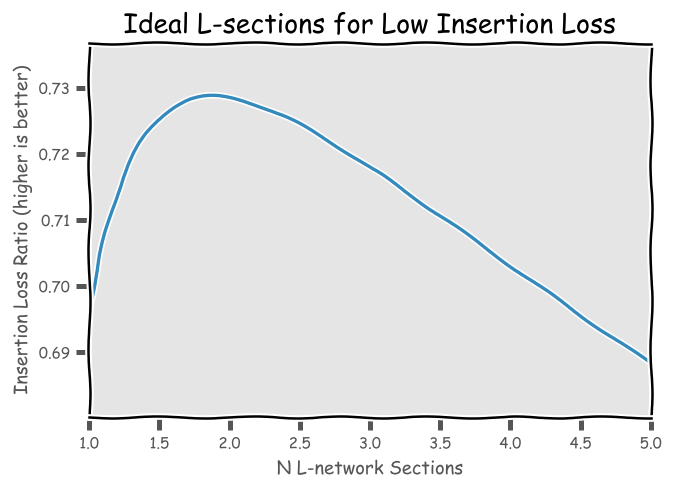

In [115]:
# problem 3b
plt.xkcd()
def insertion_loss(R_hi, R_lo, Q_u, N):
    return 1.0 / (1 + (N/Q_u) * np.sqrt((R_hi/R_lo)**(1/N) - 1))
N_vals = np.linspace(1, 5, 100)
IL_vals = [insertion_loss(1000, 50, 10, n) for n in N_vals]
plt.plot(N_vals, IL_vals)
plt.xlabel('N L-network Sections')
plt.ylabel('Insertion Loss Ratio (higher is better)')
plt.title('Ideal L-sections for Low Insertion Loss')
plt.savefig('figs/problem3b_ideal_sections.png', bbox_inches='tight', dpi=300)

In [105]:
# problem 3b parameters
R_L = 1000.0
R_S = 50.0
N = 2.0
R_i = np.sqrt(R_L * R_S)
Q_opt = np.sqrt((R_L / R_S)**(1.0/N) - 1)
print(R_i, Q_opt)

net1_Xp = R_L / Q_opt
net1_Xs = net1_Xp / (1 + Q_opt**-2)
net1_C = 1.0 / (1e9 * 2 * np.pi * net1_Xp)
net1_L = net1_Xs / (1e9 * 2 * np.pi)
print(net1_Xp, net1_Xs, net1_C, net1_L)

net2_Xp = R_i / Q_opt
net2_Xs = net2_Xp / (1 + Q_opt**-2)
net2_C = 1.0 / (1e9 * 2 * np.pi * net2_Xp)
net2_L = net2_Xs / (1e9 * 2 * np.pi)
print(net2_Xp, net2_Xs, net2_C, net2_L)

net1_C_res = (1.0 / (1e9*2*np.pi * net1_C)) / 20.0
net2_C_res = (1.0 / (1e9*2*np.pi * net2_C)) / 20.0
net1_L_res = (1e9*2*np.pi * net1_L) / 20.0
net2_L_res = (1e9*2*np.pi * net2_L) / 20.0
print(net1_C_res, net2_C_res, net1_L_res, net2_L_res)

223.60679775 1.86336683318
536.662981327 416.661490601 2.96564042294e-13 6.63137358252e-08
120.001490725 93.1683416591 1.3262747165e-12 1.48282021147e-08
26.8331490663 6.00007453627 20.8330745301 4.65841708295
